In [1]:
#Data Preprocessing

In [2]:
#importing the required libraries

In [3]:
import numpy as np #alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [4]:
df=pd.read_csv("Churn_ Data.csv")  #to read the data

In [5]:
df

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                 -0.76        88.0482          3.106604           3.754955   
1                 -0.98        67.5039          3.094574           5.550865   
2                 -0.98        33.9248          2.324016           2.438114   
3                 -0.92        82.6780          2.630749           2.858961   
4                 -0.97        96.8379          2.674316           2.912397   
...                 ...            ...               ...                ...   
24995              0.21       132.0365          2.652236           2.857739   
24996              0.80        77.0154          3.763389           5.012503   
24997              0.01       148.8337          3.823940           4.334250   
24998              0.17      1012.4398         14.667580          14.579567   
24999             -1.00       275.3530          5.134579           5.954062   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0                  4                14          39.29            57.320   
1                  1                 2          21.67            38.700   
2                  2                 3          30.00            15.320   
3                  2                 3          50.00            51.956   
4                  3                 2          22.50            66.886   
...              ...               ...            ...               ...   
24995              5                 8          26.67           123.396   
24996              2                 8          27.88            62.140   
24997              6                10          10.00            98.900   
24998              7                67          42.92           734.005   
24999              1                 1          53.50           250.340   

       s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
0              -0.17                 1  ...                    0.454642   
1              -0.32                 3  ...                    0.343190   
2              -0.05                 3  ...                    0.101838   
3              -0.18                 4  ...                    0.066602   
4               0.01                 4  ...                    0.219821   
...              ...               ...  ...                         ...   
24995          -0.16                 4  ...                    0.145831   
24996           0.19                 4  ...                    0.529829   
24997          -0.03                 2  ...                    0.327245   
24998           0.70                 4  ...                    0.824671   
24999          -0.48                 4  ...                    0.377281   

       prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
0                0.497397                 4                  0   
1                0.767617                 6                  0   
2                0.619034                 6                  1   
3                0.437088                 7                  2   
4                0.585977                 6                  1   
...                   ...               ...                ...   
24995            0.200151                 7                  0   
24996            0.169835                 7                  0   
24997            0.407944                 3                  0   
24998            0.889239                 7                  1   
24999            0.609046                 7                  0   

       s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  \
0                       9              6.02           8.20   
1                      20              3.66           8.10   
2                      19              4.33           4.36   
3                      11              3.40           3.53   
4                      14              3.85           3.87   
...                   ...               ...            ...   
24995                  18    

In [6]:
df.head() #give records from the starting
#df.head(5)

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0             -0.76        88.0482          3.106604           3.754955   
1             -0.98        67.5039          3.094574           5.550865   
2             -0.98        33.9248          2.324016           2.438114   
3             -0.92        82.6780          2.630749           2.858961   
4             -0.97        96.8379          2.674316           2.912397   

   s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0              4                14          39.29            57.320   
1              1                 2          21.67            38.700   
2              2                 3          30.00            15.320   
3              2                 3          50.00            51.956   
4              3                 2          22.50            66.886   

   s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
0          -0.17                 1  ...                    0.454642   
1          -0.32                 3  ...                    0.343190   
2          -0.05                 3  ...                    0.101838   
3          -0.18                 4  ...                    0.066602   
4           0.01                 4  ...                    0.219821   

   prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
0            0.497397                 4                  0   
1            0.767617                 6                  0   
2            0.619034                 6                  1   
3            0.437088                 7                  2   
4            0.585977                 6                  1   

   s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  prop.og.mou.any.p6  \
0                   9              6.02           8.20           46.465636   
1                  20              3.66           8.10           34.525456   
2                  19              4.33           4.36           10.298451   
3                  11              3.40           3.53            6.670783   
4                  14              3.85           3.87           21.998905   

   prop.loc.i2i.mou.og.mou.p3  s3.rev.p1  
0                    0.609456       0.22  
1                    1.000000       0.38  
2                    0.699592       0.11  
3                    0.086617       5.18  
4                    0.683105       0.10  

[5 rows x 111 columns]

In [7]:
df.tail #give records from the ending

<bound method NDFrame.tail of        s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                 -0.76        88.0482          3.106604           3.754955   
1                 -0.98        67.5039          3.094574           5.550865   
2                 -0.98        33.9248          2.324016           2.438114   
3                 -0.92        82.6780          2.630749           2.858961   
4                 -0.97        96.8379          2.674316           2.912397   
...                 ...            ...               ...                ...   
24995              0.21       132.0365          2.652236           2.857739   
24996              0.80        77.0154          3.763389           5.012503   
24997              0.01       148.8337          3.823940           4.334250   
24998              0.17      1012.4398         14.667580          14.579567   
24999             -1.00       275.3530          5.134579           5.954062   

       s4.usg.ins.p2 

In [8]:
df.shape #gives actual shape of rows & columns

(25000, 111)

In [9]:
df.columns.values  #present column names

array(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2',
       's2.rch.val.p6', 's1.og.rev.all.m1', 's8.new.rev.p6',
       's4.loc.ic.ins.p1', 's8.mbl.p2', 's2.rch.val.l67',
       's7.s4.day.no.mou.p2.p4', 's3.new.rev.p3', 's7.s5.s4.day.nomou.p4',
       's8.og.rev.p3', 's8.ic.mou.all.p3', 'target', 's7.new.rev.p2.p6',
       's6.rtd.mou.p2.m2', 's7.rtd.mou.p2.p6', 's1.new.rev.p2',
       's1.new.rev.p1', 's1.og.hom.mou.p1', 's7.rev.p2.p6',
       's1.og.hom.rev.p2', 's1.rtd.mou.p1', 's1.og.rev.all.p1',
       's1.og.mou.all.p1', 's3.og.rev.all.p1', 's7.new.rev.p3.p6',
       'ds.usg.p6', 'snd.dec.p2', 's3.og.mou.all.p1', 'ds.og.usg.p4',
       's1.og.mou.all.p2', 's8.og.rev.p6', 's1.og.hom.mou.p2',
       's5.og.rev.all.p1', 's1.og.rev.all.p2', 's1.rtd.mou.p2',
       's5.rtd.mou.p1', 's1.og.mou.any.p2', 's4.day.no.mou.p2',
       's1.hom.rmg.rev.p2', 's7.rtd.mou.p3.p6', 's5.og.mou.all.p1',
       's5.og.hom.mo

In [10]:
df.dtypes  #to get the types of data present

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                   int64
                               ...   
s3.og.rev.all.m2              float64
s3.new.rev.m2                 float64
prop.og.mou.any.p6            float64
prop.loc.i2i.mou.og.mou.p3    float64
s3.rev.p1                     float64
Length: 111, dtype: object

In [11]:
# Check the descriptive statistics of numeric variables
df.describe()

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
count      25000.000000   25000.000000      25000.000000       25000.000000   
mean          -0.003730     281.073083          4.890003           7.070194   
std            2.727916     276.075983          4.212452           6.318992   
min           -1.000000       0.000000          0.000000           0.000833   
25%           -0.580000     101.563800          2.367288           3.318825   
50%           -0.170000     204.859600          3.729944           5.231268   
75%            0.280000     370.711650          5.993342           8.395736   
max          316.860000    5702.924300        153.221695         170.200441   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
count   25000.000000      25000.000000   25000.000000      25000.000000   
mean        5.460080         28.532520      72.208906        218.517937   
std         2.184444         28.061435      67.921490        231.321064   
min         0.000000          0.000000       0.000000          0.000000   
25%         5.000000          9.000000      33.000000         74.420000   
50%         7.000000         21.000000      52.260000        151.168500   
75%         7.000000         39.000000      89.852500        284.265000   
max         7.000000        622.000000    2249.000000       3767.565000   

       s8.new.rev.p6  s4.loc.ic.ins.p1  ...  prop.og.mou.tot.mou.all.p6  \
count   25000.000000      25000.000000  ...                25000.000000   
mean       -0.028327          3.254720  ...                    0.538407   
std         0.354573          1.193271  ...                    0.209203   
min        -5.090000          0.000000  ...                    0.000000   
25%        -0.160000          3.000000  ...                    0.394227   
50%        -0.020000          4.000000  ...                    0.539354   
75%         0.110000          4.000000  ...                    0.682695   
max         5.000000          4.000000  ...                    1.000000   

       prop.i2i.og.mou.p6  s4.loc.ic.ins.p2  s4.std.ic.ins.l14  \
count        25000.000000      25000.000000       25000.000000   
mean             0.485523          5.731280           1.797320   
std              0.271146          1.936848           3.048943   
min              0.000000          0.000000           0.000000   
25%              0.274034          5.000000           0.000000   
50%              0.476759          7.000000           0.000000   
75%              0.694104          7.000000           2.000000   
max              1.000000          7.000000          14.000000   

       s4.low.blnc.ins.p4  s3.og.rev.all.m2  s3.new.rev.m2  \
count        25000.000000      25000.000000   25000.000000   
mean             8.382160          8.008660      12.540182   
std              8.961016          6.152429      11.540611   
min              0.000000          0.000000       0.000000   
25%              1.000000          4.207500       6.167500   
50%              5.000000          6.345000       9.350000   
75%             14.000000          9.830000      14.620000   
max             30.000000        171.780000     386.480000   

       prop.og.mou.any.p6  prop.loc.i2i.mou.og.mou.p3     s3.rev.p1  
count        25000.000000                25000.000000  25000.000000  
mean            53.594165                    0.483975      9.951366  
std             21.408486                    0.292349     17.648128  
min              0.000000                    0.000000      0.000000  
25%             39.378142                    0.251304      1.970000  
50%             53.976203                    0.477621      5.380000  
75%             68.312416                    0.716538     11.400000  
max            100.000000                    1.000000    585.500000  

[8 rows x 111 columns]

In [12]:
# basic info
df.info(" ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 111 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    s6.new.rev.p2.m2            float64
 1    s1.new.rev.m1               float64
 2    s3.og.rev.4db.p5            float64
 3    s3.new.rev.4db.p5           float64
 4    s4.usg.ins.p2               int64  
 5    s4.og.unq.any.p2            int64  
 6    s2.rch.val.p6               float64
 7    s1.og.rev.all.m1            float64
 8    s8.new.rev.p6               float64
 9    s4.loc.ic.ins.p1            int64  
 10   s8.mbl.p2                   float64
 11   s2.rch.val.l67              float64
 12   s7.s4.day.no.mou.p2.p4      float64
 13   s3.new.rev.p3               float64
 14   s7.s5.s4.day.nomou.p4       float64
 15   s8.og.rev.p3                float64
 16   s8.ic.mou.all.p3            float64
 17   target                      int64  
 18   s7.new.rev.p2.p6            float64
 19   s6

In [13]:
#to check the duplicate values are present in dataset or not

duplicate_rows = df[df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [s6.new.rev.p2.m2, s1.new.rev.m1, s3.og.rev.4db.p5, s3.new.rev.4db.p5, s4.usg.ins.p2, s4.og.unq.any.p2, s2.rch.val.p6, s1.og.rev.all.m1, s8.new.rev.p6, s4.loc.ic.ins.p1, s8.mbl.p2, s2.rch.val.l67, s7.s4.day.no.mou.p2.p4, s3.new.rev.p3, s7.s5.s4.day.nomou.p4, s8.og.rev.p3, s8.ic.mou.all.p3, target, s7.new.rev.p2.p6, s6.rtd.mou.p2.m2, s7.rtd.mou.p2.p6, s1.new.rev.p2, s1.new.rev.p1, s1.og.hom.mou.p1, s7.rev.p2.p6, s1.og.hom.rev.p2, s1.rtd.mou.p1, s1.og.rev.all.p1, s1.og.mou.all.p1, s3.og.rev.all.p1, s7.new.rev.p3.p6, ds.usg.p6, snd.dec.p2, s3.og.mou.all.p1, ds.og.usg.p4, s1.og.mou.all.p2, s8.og.rev.p6, s1.og.hom.mou.p2, s5.og.rev.all.p1, s1.og.rev.all.p2, s1.rtd.mou.p2, s5.rtd.mou.p1, s1.og.mou.any.p2, s4.day.no.mou.p2, s1.hom.rmg.rev.p2, s7.rtd.mou.p3.p6, s5.og.mou.all.p1, s5.og.hom.mou.p1, s3.new.rev.p1, s4.usg.ins.p1, s2.s4.day.no.mou.p2, s7.new.rev.l21.p6, s5.rev.p1, s5.s4.day.no.mou.p2, tot.s4.day.no.mou.p2, s8.new.rev.p3, s3.og.mou.all.p2, s1.rev.p1, s4.loc.og.ins.p1, s1.loc.og.mou.p1, s4.og.any.p2, prop.og.mou.any.p2, s4.low.blnc.ins.p3, s1.loc.og.mou.p2, s5.new.rev.p2, s5.new.rev.p1, s4.low.blnc.ins.l14, s3.og.hom.mou.p1, s7.rtd.mou.l21.p6, s4.loc.og.ins.l14, s8.rtd.mou.p3, s4.dec.ins.l14, s2.s4.day.no.mou.p3, s3.new.rev.p2, tot.s4.day.no.mou.p3, s5.og.mou.all.p2, s4.loc.ic.ins.l14, s4.usg.ins.l14, s4.loc.og.ins.p2, s3.rtd.mou.p1, s7.s5.s4.day.nomou.p2, s8.og.mou.all.p6, s5.og.hom.mou.p2, s7.rtd.mou.m1.m2, prop.og.mou.tot.mou.all.p2, s8.rev.p6, s7.s5.s4.day.nomou.p3, s5.rev.p2, s1.new.rev.m2, s3.og.rev.3db.p5, s4.rch.val.gt.30.p2, s8.rtd.mou.p6, s4.std.ins.l14, s4.low.blnc.ins.p2, s4.low.blnc.ins.p6, s4.loc.ins.l14, s4.low.blnc.ins.m2, s4.data.ins.l14, prop.loc.i2i.mou.og.mou.p6, s4.dec.ins.p2, ...]
Index: []

[0 rows x 111 columns]

In [14]:
# Identify columns with only one unique value
unique_value_columns = [col for col in df.columns if df[col].nunique() == 1]

# Remove those columns
df.drop(columns=unique_value_columns, inplace=True)

# Verify the removal
print("Number of columns after removing single unique value columns:", df.shape[1])
print("Removed columns:", unique_value_columns)

# Display the updated DataFrame
print(df.head())

Number of columns after removing single unique value columns: 111
Removed columns: []
   s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0             -0.76        88.0482          3.106604           3.754955   
1             -0.98        67.5039          3.094574           5.550865   
2             -0.98        33.9248          2.324016           2.438114   
3             -0.92        82.6780          2.630749           2.858961   
4             -0.97        96.8379          2.674316           2.912397   

   s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0              4                14          39.29            57.320   
1              1                 2          21.67            38.700   
2              2                 3          30.00            15.320   
3              2                 3          50.00            51.956   
4              3                 2          22.50            66.886   

   s8.new.rev.p6  s4.loc.ic.ins.p1  

In [15]:
# removing zero variance variables
#process of eliminating features from a dataset that have the same value for all observations, 
#thus providing no useful information for analysis or modeling.

zero_variance_cols = [col for col in df.columns if df[col].nunique() == 1]
data_cleaned = df.drop(columns=zero_variance_cols)


# Display the columns removed and the new shape of the dataset
print("Removed zero variance columns:", zero_variance_cols)
print("New shape of the dataset:", data_cleaned.shape)

Removed zero variance columns: []
New shape of the dataset: (25000, 111)


In [16]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing values in each column:")
print(missing_values)

# Display columns with missing values and their percentage
missing_values_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
print("Summary of missing values in each column:")
print(missing_summary[missing_summary['Missing Values'] > 0])


Missing values in each column:
s6.new.rev.p2.m2              0
s1.new.rev.m1                 0
s3.og.rev.4db.p5              0
s3.new.rev.4db.p5             0
s4.usg.ins.p2                 0
                             ..
s3.og.rev.all.m2              0
s3.new.rev.m2                 0
prop.og.mou.any.p6            0
prop.loc.i2i.mou.og.mou.p3    0
s3.rev.p1                     0
Length: 111, dtype: int64
Summary of missing values in each column:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


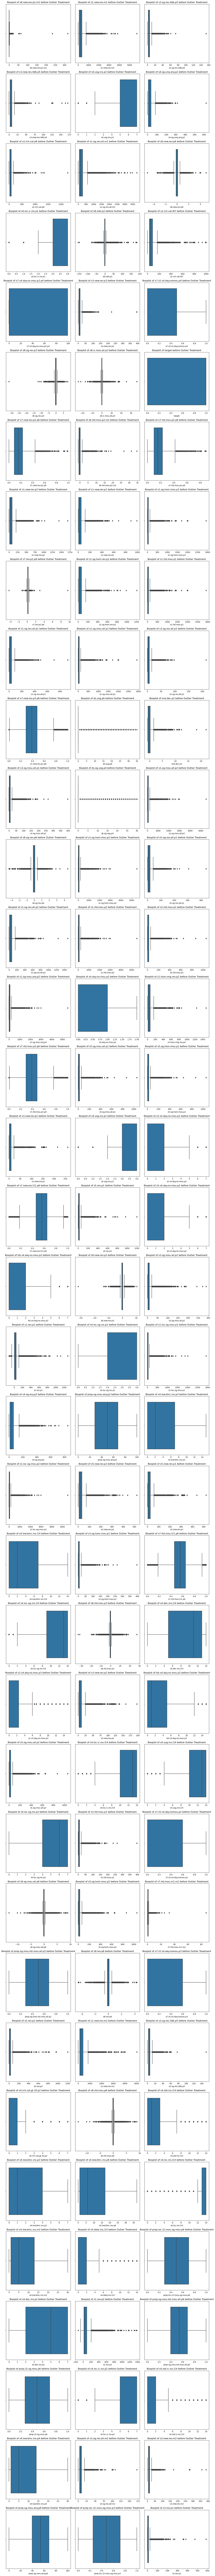

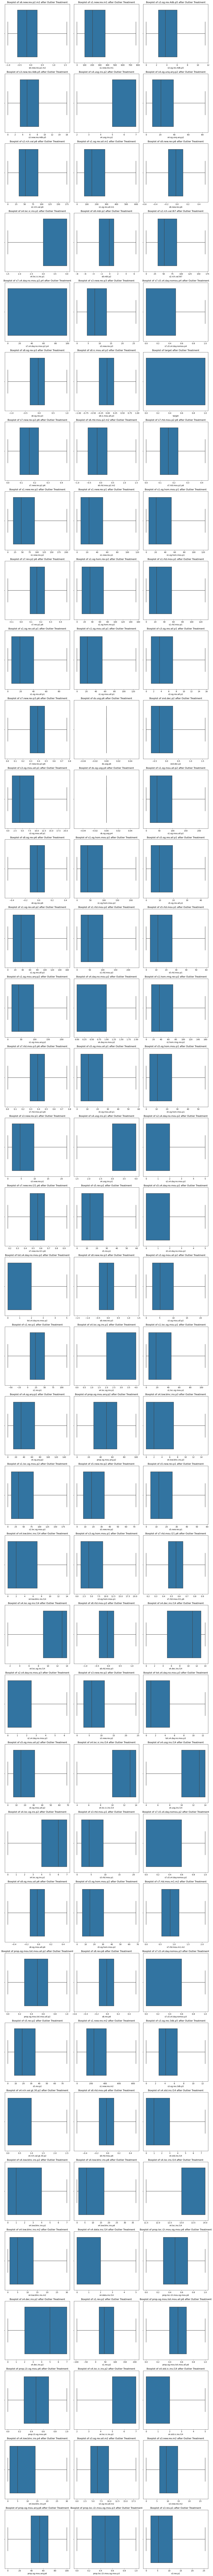


Outlier bounds for each numeric column:
s6.new.rev.p2.m2: Lower Bound = -1.87, Upper Bound = 1.57
s1.new.rev.m1: Lower Bound = -302.1579749999999, Upper Bound = 774.4334249999999
s3.og.rev.4db.p5: Lower Bound = -3.0717925121249987, Upper Bound = 11.432423124874997
s3.new.rev.4db.p5: Lower Bound = -4.296540105125002, Upper Bound = 16.011101315875003
s4.usg.ins.p2: Lower Bound = 2.0, Upper Bound = 10.0
s4.og.unq.any.p2: Lower Bound = -36.0, Upper Bound = 84.0
s2.rch.val.p6: Lower Bound = -52.27874999999999, Upper Bound = 175.13124999999997
s1.og.rev.all.m1: Lower Bound = -240.3474999999999, Upper Bound = 599.0324999999999
s8.new.rev.p6: Lower Bound = -0.5650000000000001, Upper Bound = 0.515
s4.loc.ic.ins.p1: Lower Bound = 1.5, Upper Bound = 5.5
s8.mbl.p2: Lower Bound = -7.960000000000001, Upper Bound = 6.44
s2.rch.val.l67: Lower Bound = -47.6275, Upper Bound = 168.71249999999998
s7.s4.day.no.mou.p2.p4: Lower Bound = -148.25000000000003, Upper Bound = 247.35000000000002
s3.new.rev.p3: Lo

In [22]:
#-->using boxplot

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate number of rows and columns needed for subplots
num_cols = len(numeric_cols)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1  # Calculate number of rows required

# Visualize the numeric columns before outlier treatment
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of rows
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} before Outlier Treatment')
    plt.tight_layout()
plt.show()

# Define a function to identify and treat outliers using IQR
def treat_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df[col], lower_bound, upper_bound

# Apply the function to each numeric column and visualize
outlier_bounds = {}
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of rows
for i, col in enumerate(numeric_cols):
    treated_col, lower_bound, upper_bound = treat_outliers_iqr(df, col)
    df[col] = treated_col
    outlier_bounds[col] = (lower_bound, upper_bound)

    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after Outlier Treatment')
    plt.tight_layout()
plt.show()

# Display the bounds used for outlier detection
print("\nOutlier bounds for each numeric column:")
for col, bounds in outlier_bounds.items():
    print(f"{col}: Lower Bound = {bounds[0]}, Upper Bound = {bounds[1]}")


In [17]:
# Step 1: Feature Selection (remove highly correlated columns)

# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than 0.9
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop features
df_reduced = df.drop(columns=to_drop)

# Step 2: Outlier Removal (using Z-score method)
# Calculate the Z-scores for numerical columns
numeric_cols = df_reduced.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df_reduced[numeric_cols]))

# Define a threshold for the Z-score
z_threshold = 4

# Identify outliers
outliers = (z_scores > z_threshold)

# Remove outliers
df_reduced = df_reduced[~(outliers.any(axis=1))]

# Step 3: Sampling (select a random sample)
# Set the desired sample size (e.g., 80% of the original data)
sample_size = 0.8
df_sampled = df_reduced.sample(frac=sample_size, random_state=42)

# Get the shape of the finalized DataFrame
rows, cols = df_sampled.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 17156
Number of columns: 60


In [18]:

output_file = r'C:\Users\Dell\Desktop\dataset.csv'

# Save the DataFrame to a CSV file
df_sampled.to_csv(output_file, index=False)

print(f"DataFrame saved to {output_file}")


DataFrame saved to C:\Users\Dell\Desktop\dataset.csv


In [19]:
# Multicollinearity (VIF>5)

In [20]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
print(f"Numeric columns: {numeric_cols}")

# Create a DataFrame with only numeric columns
df_numeric = df[numeric_cols].dropna()  # drop rows with missing values for VIF calculation

# Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data['Feature'] = df_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(len(df_numeric.columns))]

# Display VIF values
print(vif_data)

# Filter columns with VIF less than or equal to 5
selected_columns = vif_data[vif_data['VIF'] <= 5]['Feature'].tolist()
print("Selected numeric columns with VIF <= 5:")
print(selected_columns)

Numeric columns: Index(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2',
       's2.rch.val.p6', 's1.og.rev.all.m1', 's8.new.rev.p6',
       's4.loc.ic.ins.p1',
       ...
       'prop.og.mou.tot.mou.all.p6', 'prop.i2i.og.mou.p6', 's4.loc.ic.ins.p2',
       's4.std.ic.ins.l14', 's4.low.blnc.ins.p4', 's3.og.rev.all.m2',
       's3.new.rev.m2', 'prop.og.mou.any.p6', 'prop.loc.i2i.mou.og.mou.p3',
       's3.rev.p1'],
      dtype='object', length=111)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                        Feature           VIF
0              s6.new.rev.p2.m2      1.240843
1                 s1.new.rev.m1     19.853156
2              s3.og.rev.4db.p5     35.403000
3             s3.new.rev.4db.p5     27.147695
4                 s4.usg.ins.p2  67967.607333
..                          ...           ...
106            s3.og.rev.all.m2     16.644695
107               s3.new.rev.m2     24.371570
108          prop.og.mou.any.p6     20.330846
109  prop.loc.i2i.mou.og.mou.p3      3.940450
110                   s3.rev.p1     85.182432

[111 rows x 2 columns]
Selected numeric columns with VIF <= 5:
['s6.new.rev.p2.m2', 's8.mbl.p2', 's7.s4.day.no.mou.p2.p4', 's7.s5.s4.day.nomou.p4', 's8.ic.mou.all.p3', 'target', 's7.rev.p2.p6', 's8.rtd.mou.p3', 's7.rtd.mou.m1.m2', 's8.rev.p6', 's4.rch.val.gt.30.p2', 'prop.loc.i2i.mou.og.mou.p3']


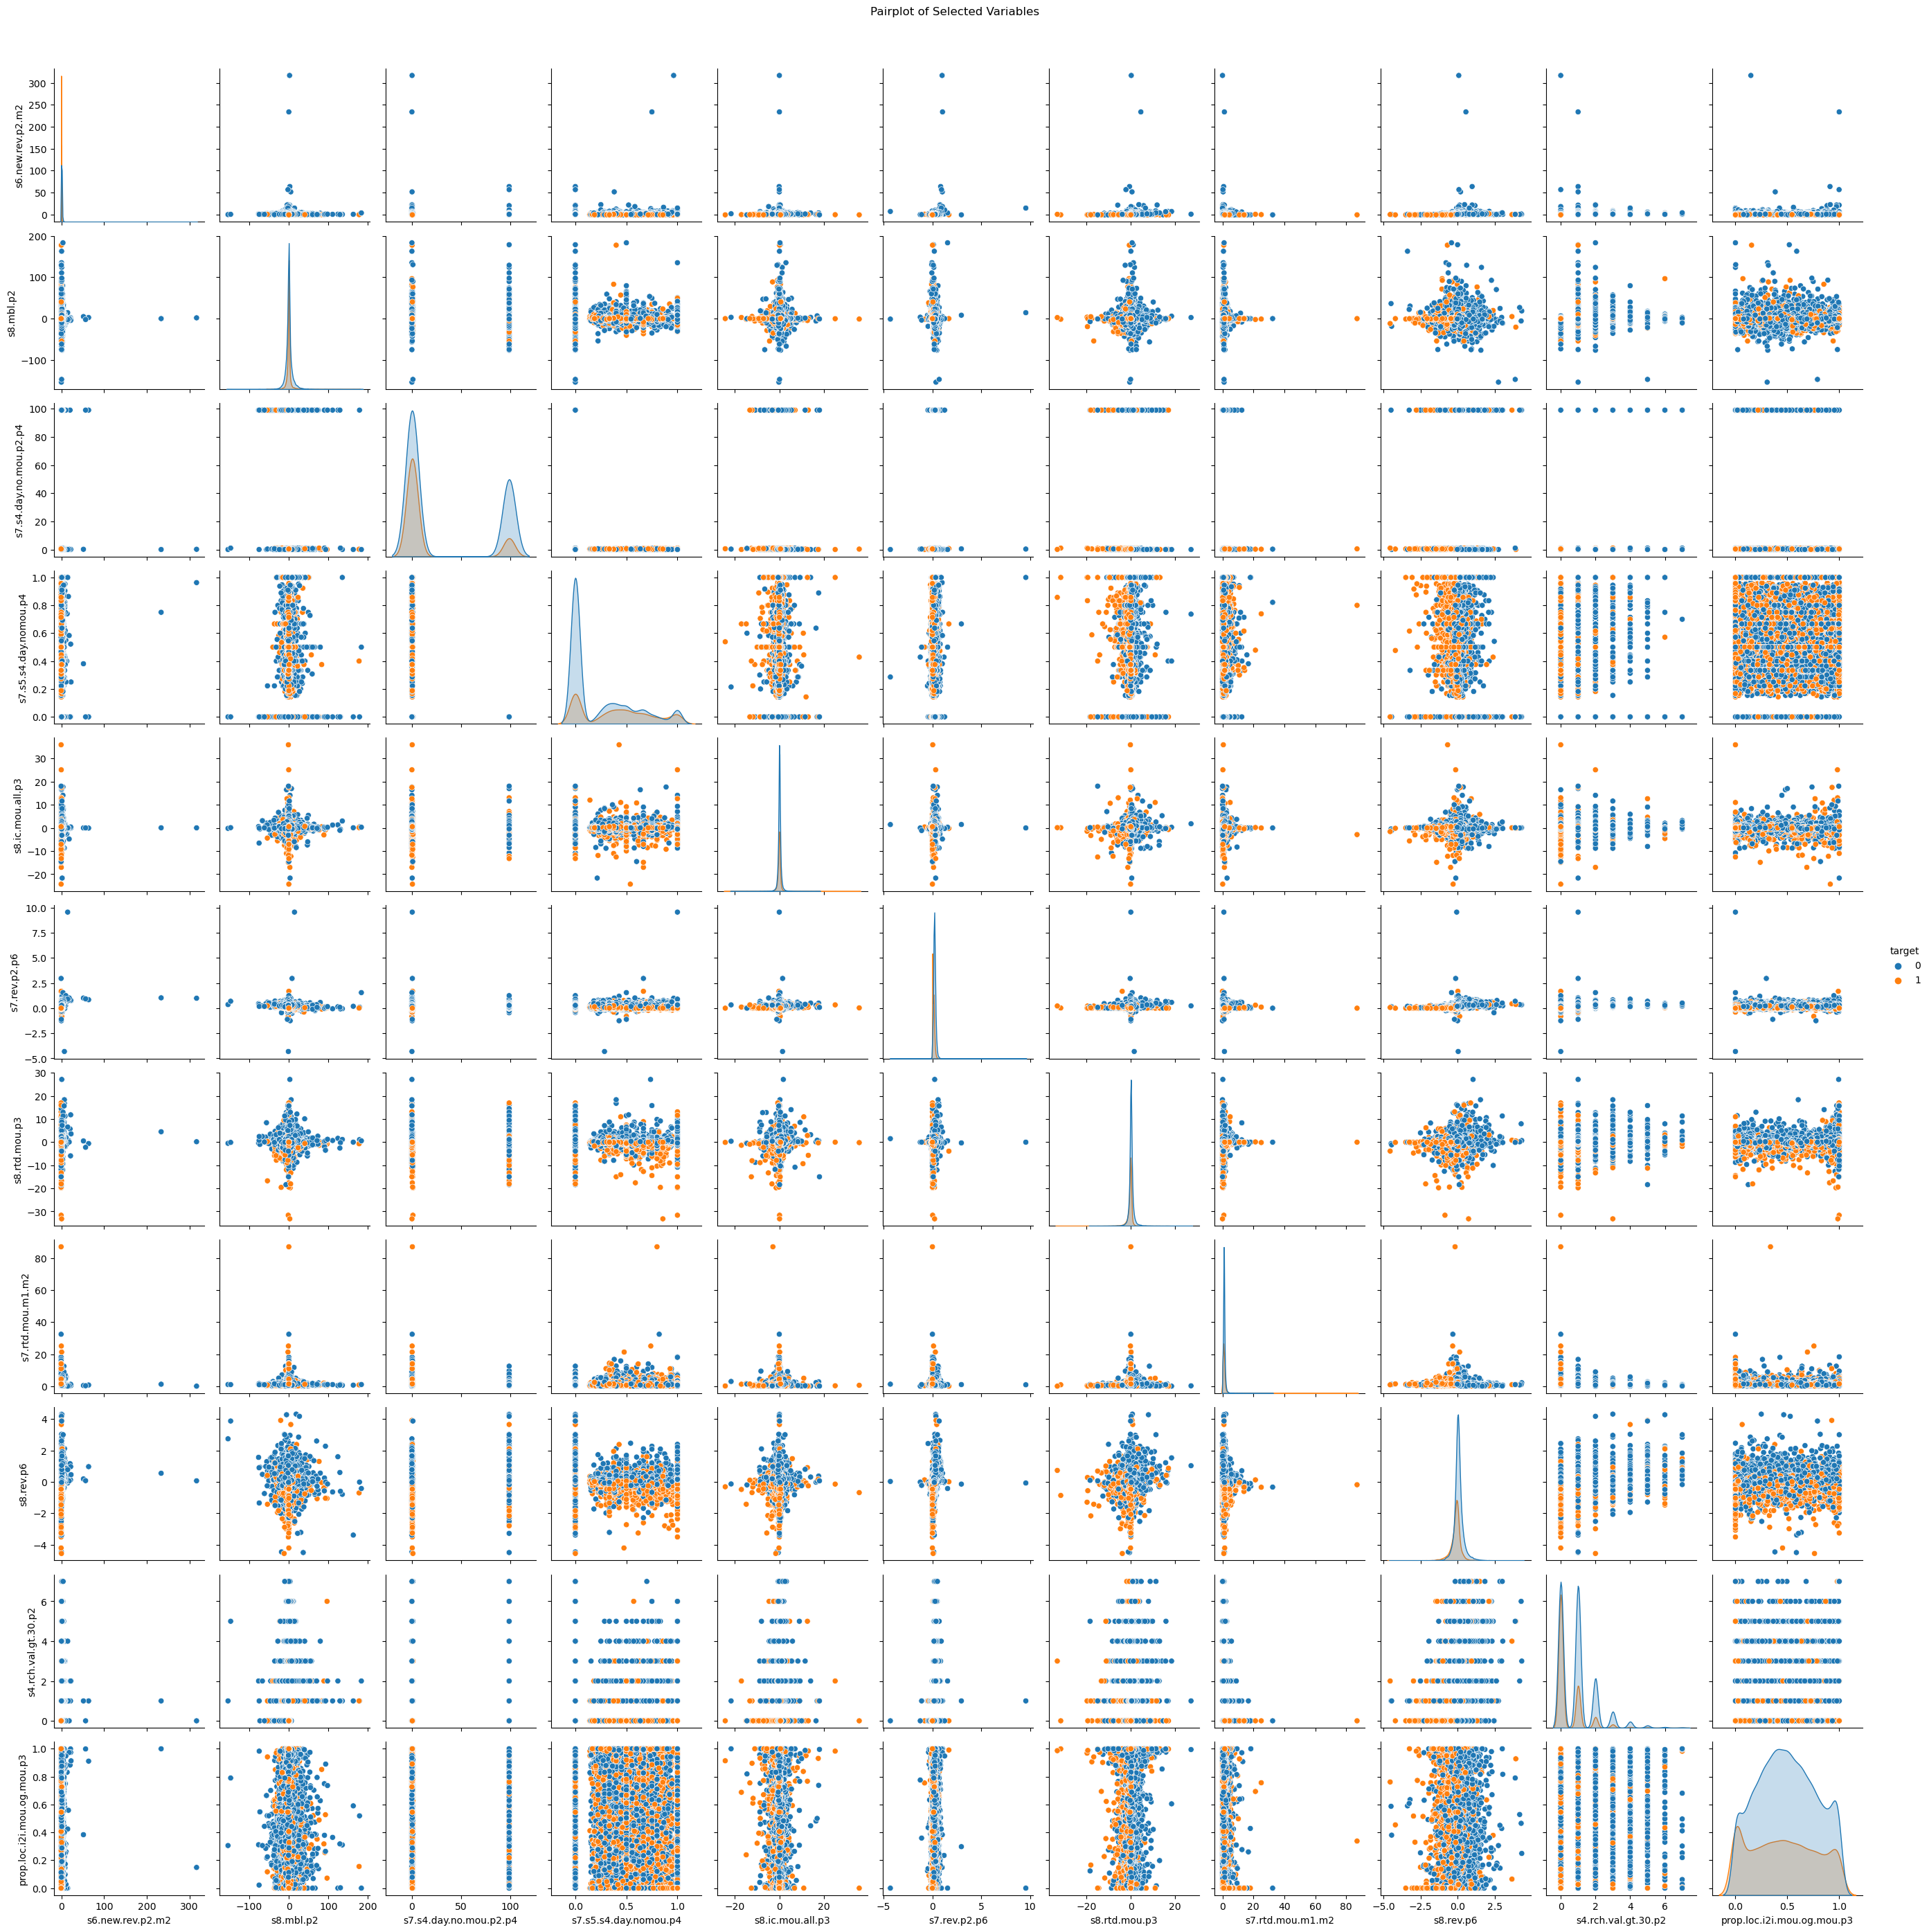

In [21]:
df_selected = df[['s6.new.rev.p2.m2', 's8.mbl.p2', 's7.s4.day.no.mou.p2.p4', 's7.s5.s4.day.nomou.p4', 
                  's8.ic.mou.all.p3', 'target', 's7.rev.p2.p6', 's8.rtd.mou.p3', 's7.rtd.mou.m1.m2', 
                  's8.rev.p6', 's4.rch.val.gt.30.p2', 'prop.loc.i2i.mou.og.mou.p3']]

# Pairplot
sns.pairplot(df_selected, hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()


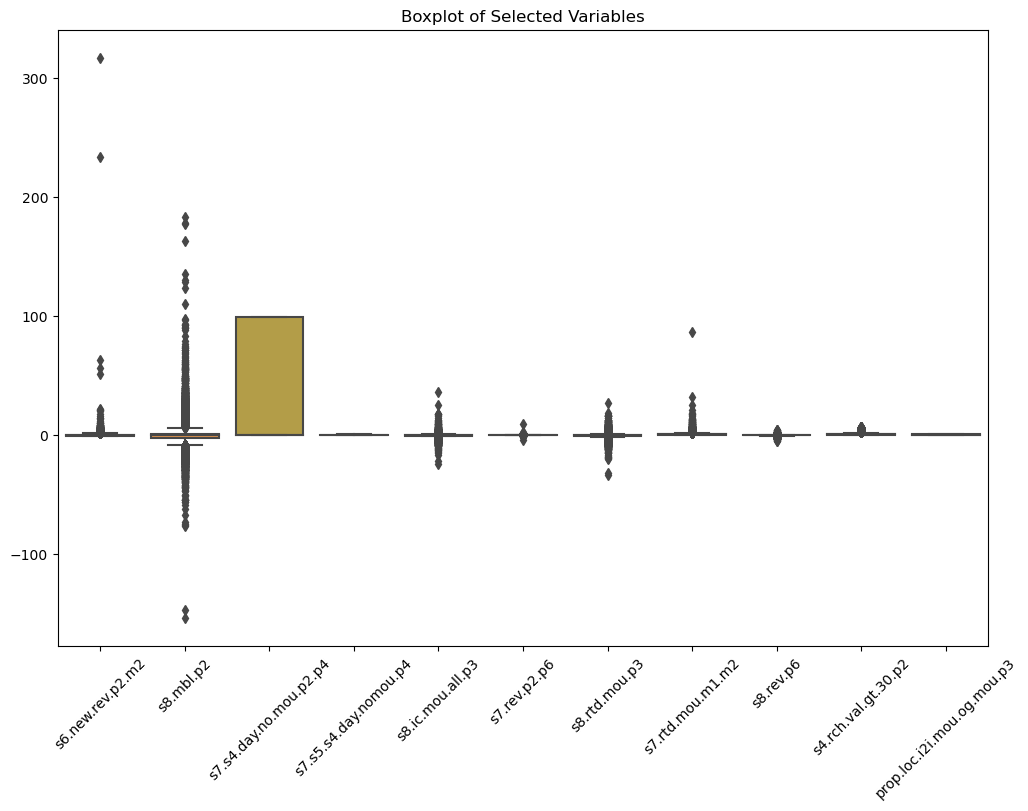

In [22]:
# Boxplot
# provides a clear overview of the distribution and variability of the selected variables, highlighting areas 
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_selected.drop(columns='target'))
plt.title('Boxplot of Selected Variables')
plt.xticks(rotation=45)
plt.show()

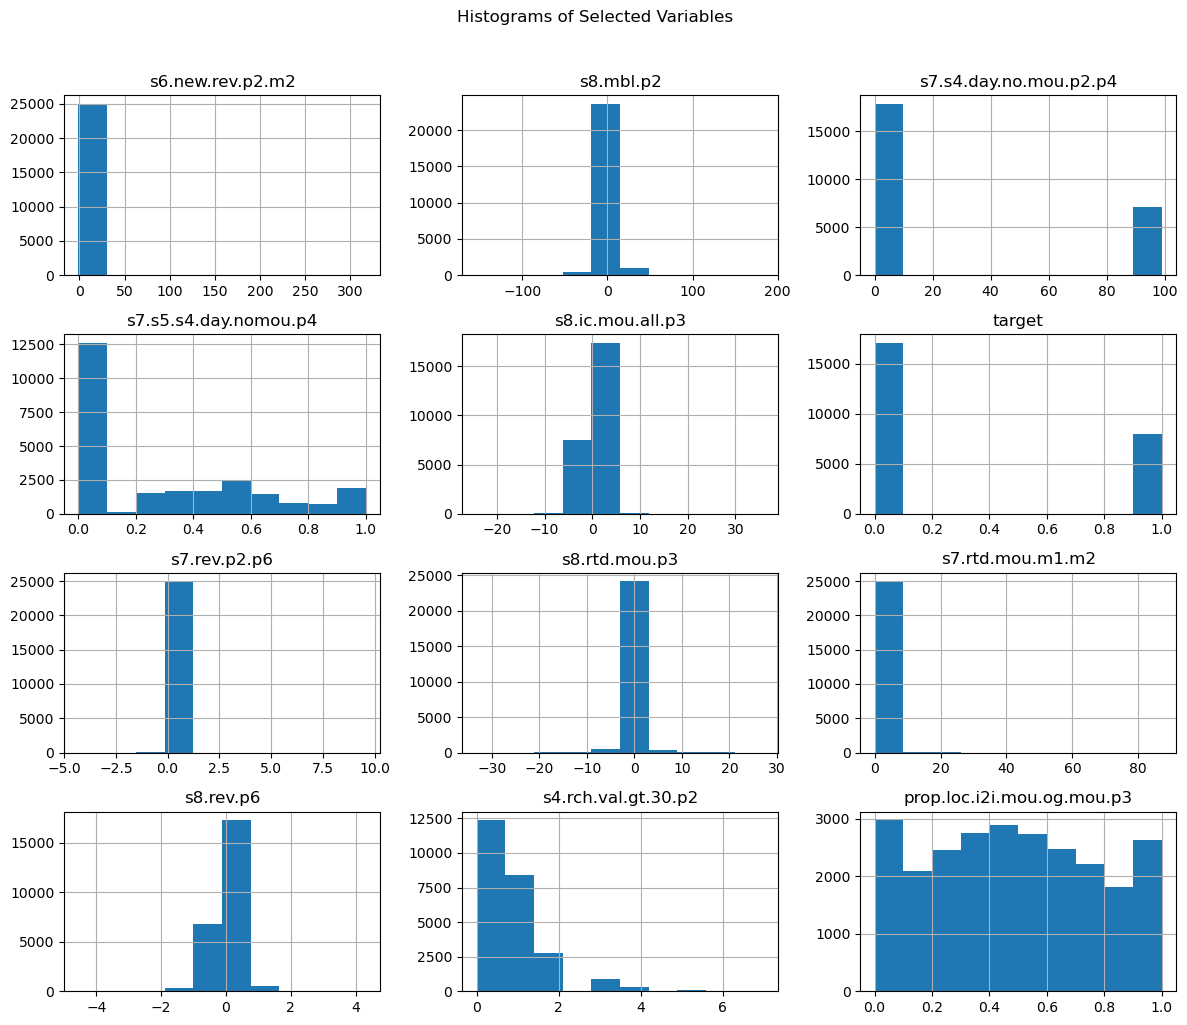

In [23]:
# Histograms
df_selected.hist(figsize=(12, 10))
plt.suptitle('Histograms of Selected Variables', x=0.5, y=1.02)
plt.tight_layout()
plt.show()

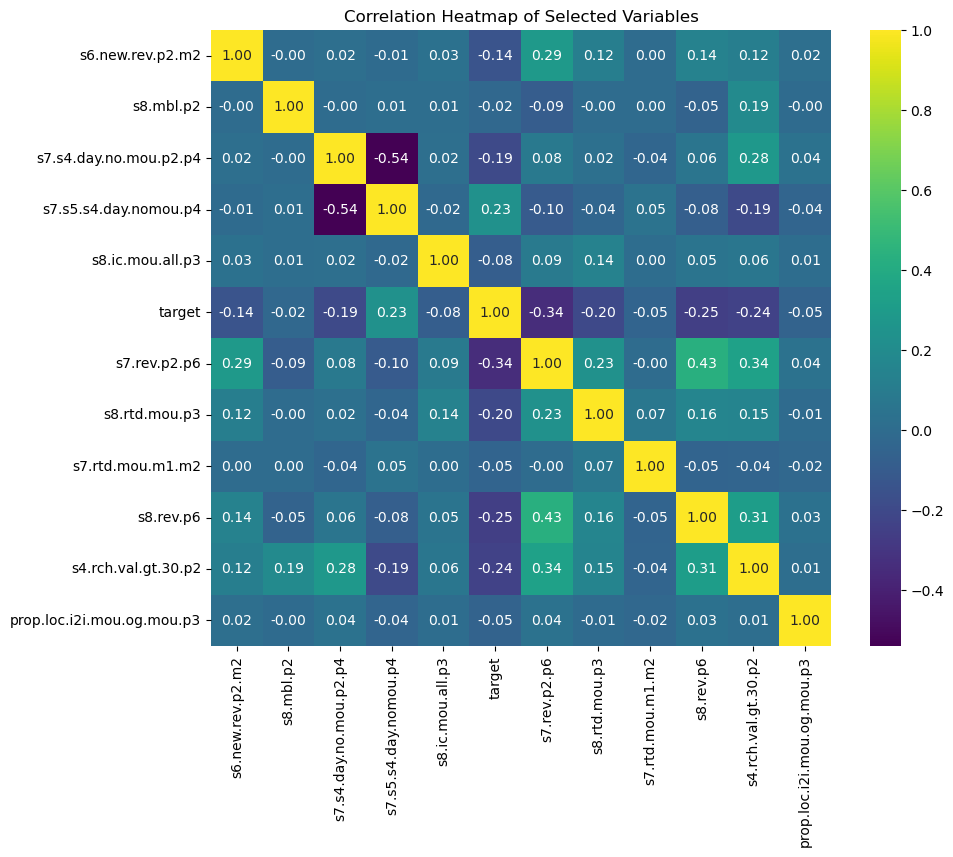

In [23]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Selected Variables')
plt.show()


# Model Implementation

In [24]:
#Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 4: Splitting into training and testing sets
X = df_sampled.drop(columns=['target'])  
y = df_sampled['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Training a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42) 
model.fit(X_train, y_train)

# Step 6: Predictions and evaluation
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Example: Print classification report
print(classification_report(y_test, y_pred))

# Optional: Visualize the Decision Tree (if desired)
# You can visualize the decision tree using tools like graphviz or matplotlib


Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2415
           1       0.52      0.55      0.53      1017

    accuracy                           0.72      3432
   macro avg       0.66      0.67      0.67      3432
weighted avg       0.72      0.72      0.72      3432



In [26]:
#Result--> In Decision Tree I'm getting the accuracy of 0.72 before hyperparameter tuning

# Hyperparameter Tuning

In [27]:
#code performs hyperparameter tuning and evaluation of a Decision Tree Classifier 
#using grid search and cross-validation. 


from sklearn.model_selection import GridSearchCV, train_test_split


#The features (X) are obtained by dropping the target column from the DataFrame.
X = df_sampled.drop(columns=['target'])  

#The target variable (y) is extracted as the target column.
y = df_sampled['target']

# Split the data into training and testing sets
#80% of the data used for training and 20% for testing
#The random_state parameter ensures reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


#Accuracy is the ratio of correctly predicted observations to the total observations. 
#It measures the overall correctness of the model.

#Precision measures the accuracy of positive predictions. 
#It is the ratio of correctly predicted positive observations to the total predicted positive observations.


#Recall measures the proportion of actual positives that are correctly identified by the model. 
#It is the ratio of correctly predicted positive observations to the all observations in the actual class.

#F1 score is the harmonic mean of precision and recall. It provides a single metric that balances 
#both precision and recall.F1 score ranges from 0 to 1, where 1 is the best possible F1 score (perfect precision and recall) 
#and 0 is the worst.

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2415
           1       0.67      0.53      0.59      1017

    accuracy                           0.78      3432
   macro avg       0.74      0.71      0.72      3432
weighted avg       0.77      0.78      0.77      3432



In [28]:
#Result--> In Decision Tree I'm getting the accuracy of 0.78 after apply the Hyperparameter Tuning.

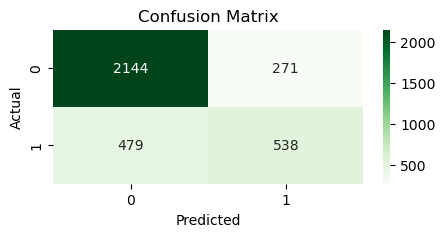

In [29]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(5,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


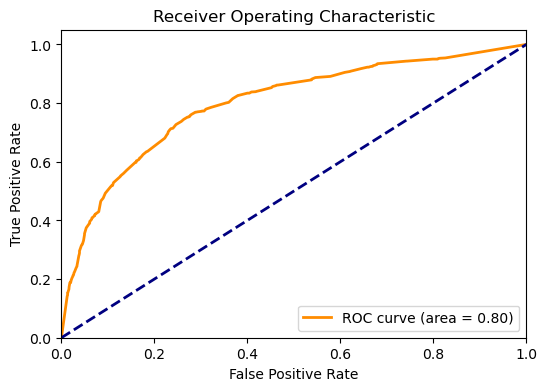

In [30]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))  

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [30]:
#PRUNING just for an example

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2415
           1       0.75      0.40      0.52      1017

    accuracy                           0.78      3432
   macro avg       0.77      0.67      0.69      3432
weighted avg       0.78      0.78      0.76      3432



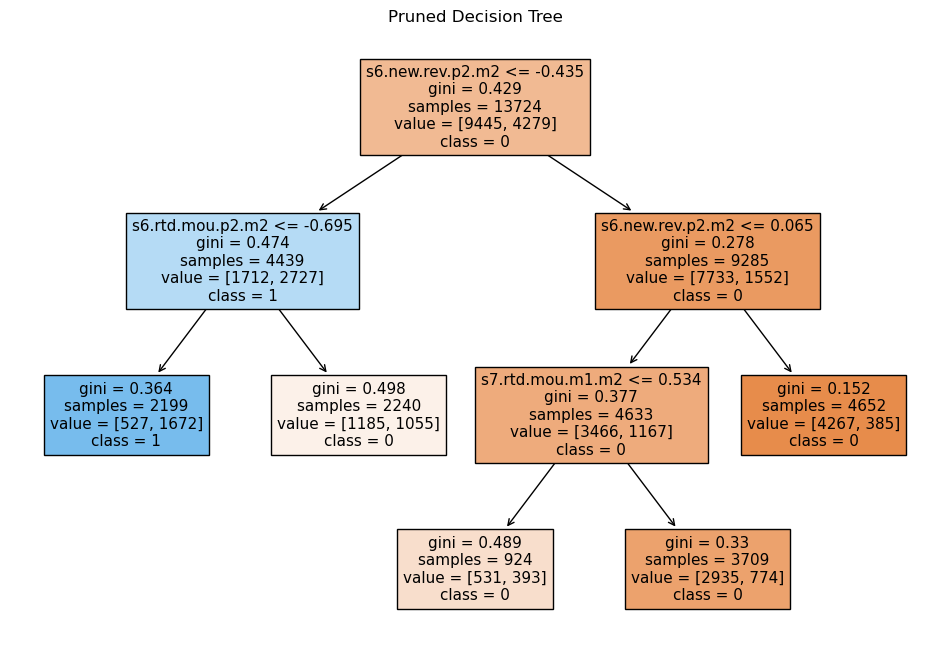

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Step 1: Splitting into training and testing sets
X = df_sampled.drop(columns=['target'])  
y = df_sampled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Training a Decision Tree model with pruning
# Use Cost Complexity Pruning (ccp_alpha) to prune the tree
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.005)  # Adjust ccp_alpha as needed
clf.fit(X_train, y_train)

# Step 3: Predictions and evaluation
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Step 4: Visualize the pruned Decision Tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'])  # Adjust class_names if needed
plt.title("Pruned Decision Tree")
plt.show()


In [32]:
#Implementation of model Random Forest & Logistic Regression 

In [33]:
#Random Forest

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2415
           1       0.71      0.57      0.63      1017

    accuracy                           0.80      3432
   macro avg       0.77      0.73      0.75      3432
weighted avg       0.79      0.80      0.80      3432



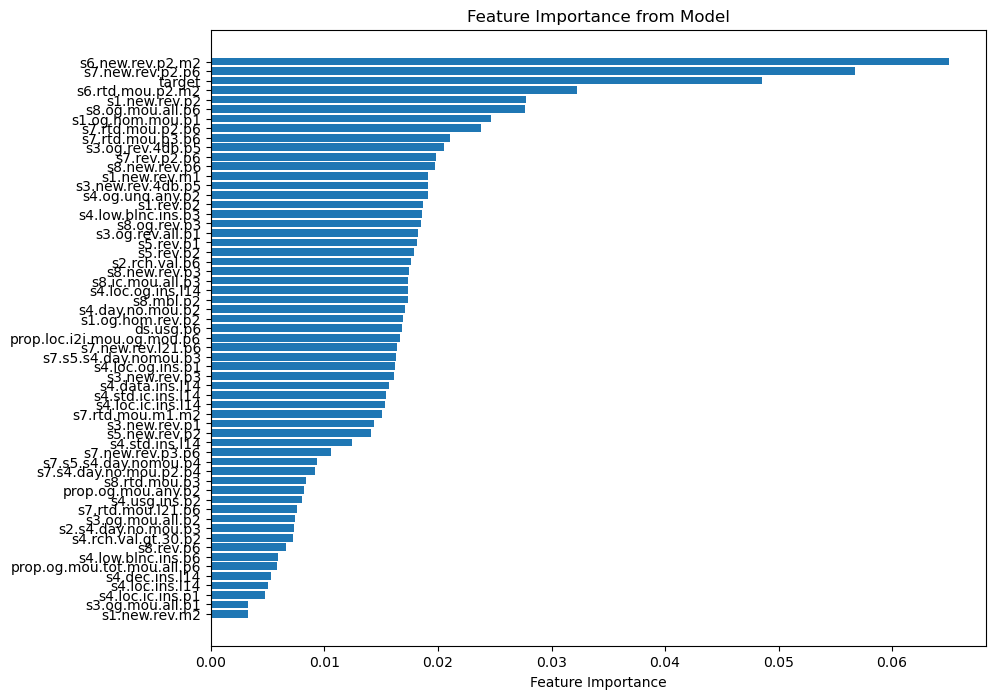

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#  df_sampled is your preprocessed and sampled DataFrame

# Step 4: Splitting into training and testing sets
X = df_sampled.drop(columns=['target'])  # Replace 'target_column' with your actual target variable
y = df_sampled['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Training a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Example Random Forest classifier with 100 trees
model.fit(X_train, y_train)

# Step 6: Predictions and evaluation
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Example: Print classification report
print(classification_report(y_test, y_pred))

# Optional: Feature importance
# RandomForestClassifier provides feature_importances_ attribute to show the relative importance of each feature
feature_importances = model.feature_importances_
#print("Feature Importances:")
##for i, importance in enumerate(feature_importances):
   # print(f"Feature {i+1}: {importance:.4f}")



# Get feature names from the DataFrame
feature_names = df_reduced.columns

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)
sorted_features = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Model')
plt.show()


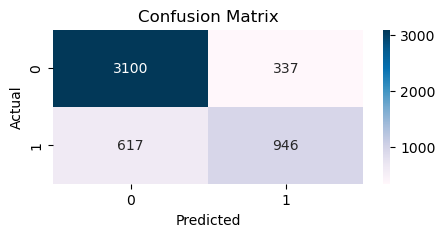

In [72]:
#Confusion Matrix

plt.figure(figsize=(5,2))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



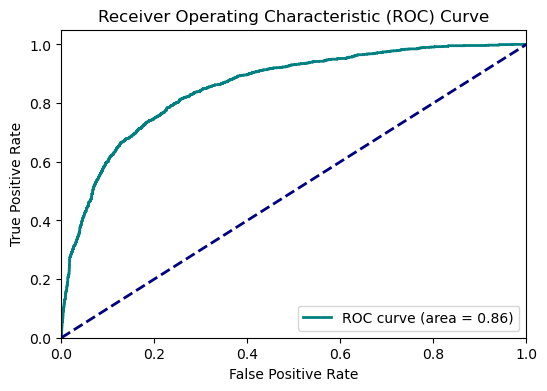

In [67]:
#ROC CURVE

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='teal', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




In [ ]:
#Accuracy is the ratio of correctly predicted observations to the total observations. 
#It measures the overall correctness of the model.

#Precision measures the accuracy of positive predictions. 
#It is the ratio of correctly predicted positive observations to the total predicted positive observations.


#Recall measures the proportion of actual positives that are correctly identified by the model. 
#It is the ratio of correctly predicted positive observations to the all observations in the actual class.

#F1 score is the harmonic mean of precision and recall. It provides a single metric that balances 
#both precision and recall.F1 score ranges from 0 to 1, where 1 is the best possible F1 score (perfect precision and recall) 
#and 0 is the worst.

In [72]:
#LOGISTIC REGRESSION

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Prepare the data
target_column = 'target'  
X = df.drop(columns=[target_column])
y = df[target_column]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3437
           1       0.74      0.60      0.66      1563

    accuracy                           0.81      5000
   macro avg       0.78      0.75      0.76      5000
weighted avg       0.80      0.81      0.80      5000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


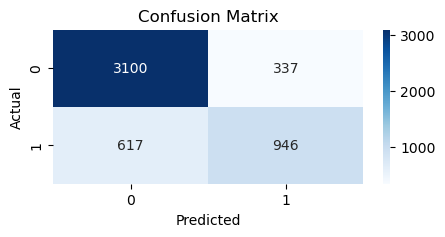

In [65]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


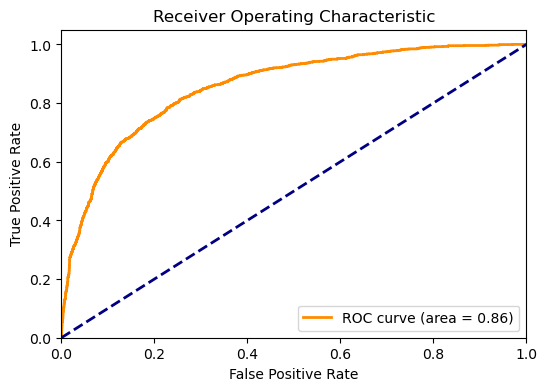

In [71]:
#ROC

#Generate and plot the ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()